In [146]:
import pandas as pd

df = pd.read_csv('cleaned_vers_data_covid19_vaccine_2020-2022_duplicate_removed.csv', nrows=500000, encoding='latin-1')



C:\Users\rutub\AppData\Local\Temp\ipykernel_19448\3178678498.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_vers_data_covid19_vaccine_2020-2022_duplicate_removed.csv', nrows=500000, encoding='latin-1')


In [147]:
def map_age_group(age):
    if age < 18:
        return 'children'
    elif age >= 18 and age <= 60:
        return 'adults'
    else:
        return 'seniors'

df['AGE_GROUP'] = df['AGE_YRS'].apply(map_age_group)

In [148]:
columns = ['VAERS_ID', 'AGE_YRS', 'SEX', 'DIED', 'L_THREAT', 'HOSPITAL', 'DISABLE', 'OFC_VISIT', 'ER_ED_VISIT', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'ALLERGIES', 'VAX_NAME', 'Symptoms', 'AGE_GROUP']
df_subset = df[columns]
df_subset = df_subset.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

df_subset.loc[df_subset['OTHER_MEDS'].str.startswith(('none', 'None', 'NONE', 'NOS', 'not', 'no', 'Not', 'na', 'NO', 'NOT', 'unknown', 'Unknown')), 'OTHER_MEDS'] = 'No medication'
df_subset.loc[df_subset['CUR_ILL'].str.startswith(('none', 'None', 'NONE', 'NOS', 'not', 'no', 'Not', 'na', 'NO', 'NOT', 'No', 'negative', 'non', 'Non', 'Nothing', 'nothing', 'unknown', 'Unknown')), 'CUR_ILL'] = 'Not applicable'
df_subset.loc[df_subset['HISTORY'].str.startswith(('none', 'None', 'NONE', 'NOS', 'not', 'no', 'Not', 'na', 'NO', 'NOT', 'No', 'negative', 'non', 'Non', 'Nothing', 'nothing', 'unknown', 'Unknown')), 'HISTORY'] = 'No concerns'
df_subset.loc[df_subset['ALLERGIES'].str.startswith(('none', 'None', 'NONE', 'NOS', 'not', 'no', 'Not', 'na', 'NO', 'NOT', 'No', 'negative', 'non', 'Non', 'Nothing', 'nothing', 'nka', 'nkda', 'NKA', 'NKDA', 'unknown', 'Unknown', 'n')), 'ALLERGIES'] = 'No allergies'

In [149]:
# Split the comma-separated values in the "Symptoms" column into individual symptoms
all_symptoms = df_subset['ALLERGIES'].str.split(',').explode().str.strip()

# Create a frequency count of each symptom
symptom_counts = all_symptoms.value_counts()

# Sort the symptoms based on their frequency count in descending order
top_10_symptoms = symptom_counts.head(60)

# Print the top 10 most occurred symptoms
print(top_10_symptoms)


ALLERGIES
No allergies          320597
penicillin             22269
sulfa                  13429
latex                   7148
codeine                 6893
amoxicillin             5184
sulfa drugs             4192
shellfish               3897
morphine                3851
pcn                     3535
erythromycin            2828
bactrim                 2640
                        2623
aspirin                 2419
iodine                  2026
cipro                   2012
gluten                  1920
keflex                  1804
seasonal allergies      1603
lisinopril              1592
pollen                  1579
augmentin               1570
peanuts                 1542
dust                    1525
mold                    1480
levaquin                1469
cats                    1431
doxycycline             1427
penicillins             1414
ibuprofen               1347
dairy                   1312
tetracycline            1289
eggs                    1270
clindamycin             1218
deme

# Frequent Patters

In [150]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori


allergy_replacement = {
    'penicillin': 'antibiotic',
    'sulfa': 'medication allergy',
    'latex': 'environmental allergy',
    'codeine': 'medication allergy',
    'amoxicillin': 'antibiotic',
    'sulfa drugs': 'medication allergy',
    'shellfish': 'food allergy',
    'morphine': 'medication allergy',
    'pcn': 'antibiotic',
    'erythromycin': 'antibiotic',
    'bactrim': 'antibiotic',
    'aspirin': 'medication allergy',
    'cipro': 'antibiotic',
    'iodine': 'environmental allergy',
    'gluten': 'food allergy',
    'keflex': 'antibiotic',
    'seasonal allergies': 'environmental allergy',
    'pollen': 'environmental allergy',
    'dust': 'environmental allergy',
    'augmentin': 'antibiotic',
    'lisinopril': 'medication allergy',
    'peanuts': 'food allergy',
    'mold': 'environmental allergy',
    'cats': 'animal allergy',
    'levaquin': 'antibiotic',
    'doxycycline': 'antibiotic',
    'ibuprofen': 'medication allergy',
    'tetracycline': 'antibiotic',
    'penicillins': 'antibiotic',
    'dairy': 'food allergy',
    'eggs': 'food allergy',
    'clindamycin': 'antibiotic',
    'demerol': 'medication allergy',
    'nsaids': 'medication allergy',
    'hydrocodone': 'medication allergy',
    'bee stings': 'insect allergy',
    'tramadol': 'medication allergy',
    'ceclor': 'antibiotic',
    'percocet': 'medication allergy',
    'vicodin': 'medication allergy',
    'tree nuts': 'food allergy',
    'shrimp': 'food allergy',
    'nickel': 'environmental allergy',
    'soy': 'food allergy',
    'sulfur': 'environmental allergy',
    'compazine': 'medication allergy',
    'grass': 'environmental allergy',
    'wheat': 'food allergy',
    'nuts': 'food allergy',
    'bees': 'insect allergy',
    'sulfa antibiotics': 'medication allergy',
    'azithromycin': 'antibiotic',
    'macrobid': 'antibiotic',
    'pineapple': 'food allergy',
    'prednisone': 'medication allergy',
    'oxycodone': 'medication allergy',
}

med_replacement = {
    'No medication': 'supplement',
    'vitamin d': 'vitamin',
    'multivitamin': 'vitamin',
    'levothyroxine': 'thyroid med',
    'lisinopril': 'BP Meds',
    'atorvastatin': 'cholesterol med',
    'metformin': 'diabetes med',
    'calcium': 'supplement',
    'vitamin c': 'vitamin',
    'fish oil': 'supplement',
    'zyrtec': 'antihistamine',
    'omeprazole': 'acid reflux med',
    'synthroid': 'thyroid med',
    'magnesium': 'supplement',
    'vitamin d3': 'vitamin',
    'losartan': 'BP Meds',
    'metoprolol': 'BP Meds',
    'zinc': 'supplement',
    'amlodipine': 'BP Meds',
    'gabapentin': 'neuropathic pain med',
    'tylenol': 'pain reliever',
    'aspirin': 'blood thinner',
    'multi vitamin': 'vitamin',
    'probiotic': 'supplement',
    'ibuprofen': 'pain reliever',
    'biotin': 'supplement',
    'flonase': 'nasal spray',
    'vit d': 'vitamin',
    'lexapro': 'antidepressant',
    'simvastatin': 'cholesterol med',
    'sertraline': 'antidepressant',
    'melatonin': 'sleep aid',
    'zoloft': 'antidepressant',
    'wellbutrin': 'antidepressant',
    'b12': 'vitamin',
    'd3': 'vitamin',
    'lipitor': 'cholesterol med',
    'claritin': 'antihistamine',
    'birth control': 'contraceptive',
    'albuterol': 'asthma med',
    'hydrochlorothiazide': 'BP Meds',
    'pantoprazole': 'acid reflux med',
    'baby aspirin': 'blood thinner',
    'allegra': 'antihistamine',
    'rosuvastatin': 'cholesterol med',
    'iron': 'supplement',
    'singulair': 'asthma med',
    'montelukast': 'asthma med',
    'atenolol': 'BP Meds',
    'folic acid': 'vitamin',
    'coq10': 'supplement',
    'turmeric': 'supplement',
    'eliquis': 'blood thinner',
    'famotidine': 'acid reflux med',
    'crestor': 'cholesterol med',
    'adderall': 'ADHD med',
    'c': 'vitamin',
    'd': 'vitamin'
}

symptom_categories = {
    'headache': 'pain',
    'pyrexia': 'fever',
    'fatigue': 'general discomfort',
    'chills': 'fever',
    'pain': 'pain',
    'dizziness': 'disorientation',
    'nausea': 'discomfort',
    'pain in extremity': 'pain',
    'injection site pain': 'pain',
    'arthralgia': 'pain',
    'myalgia': 'pain',
    'dyspnoea': 'breathing difficulty',
    'rash': 'skin condition',
    'injection site erythema': 'skin reaction',
    'pruritus': 'itching',
    'injection site swelling': 'skin reaction',
    'vomiting': 'discomfort',
    'asthenia': 'weakness',
    'hyperhidrosis': 'excessive sweating',
    'injection site pruritus': 'skin reaction',
    'erythema': 'skin condition',
    'paraesthesia': 'abnormal sensation',
    'diarrhoea': 'digestive issue',
    'hypoaesthesia': 'reduced sensation',
    'urticaria': 'skin condition',
    'chest pain': 'pain',
    'feeling abnormal': 'discomfort',
    'lymphadenopathy': 'enlarged lymph nodes',
    'cough': 'respiratory issue',
    'malaise': 'general discomfort',
    'covid-19': 'viral infection',
    'injection site warmth': 'skin reaction',
    'peripheral swelling': 'swelling',
    'syncope': 'fainting',
    'sars-cov-2 test positive': 'viral infection',
    'chest discomfort': 'pain',
    'blood test': 'medical test',
    'tremor': 'shaking',
    'palpitations': 'heart issue',
    'tinnitus': 'ringing in ears',
    'injection site rash': 'skin reaction',
    'heart rate increased': 'heart issue',
    'back pain': 'pain',
    'condition aggravated': 'worsened condition',
    'electrocardiogram': 'heart issue',
    'feeling hot': 'temperature sensitivity',
    'decreased appetite': 'appetite issue',
    'rash erythematous': 'skin condition',
    'loss of consciousness': 'fainting',
    'swelling': 'swelling',
    'neck pain': 'pain',
    'skin warm': 'temperature sensitivity',
    'oropharyngeal pain': 'throat pain',
    'mobility decreased': 'reduced movement',
    'sars-cov-2 test negative': 'viral infection',
    'rash pruritic': 'itching',
    'flushing': 'skin redness',
    'sleep disorder': 'sleep issue',
    'migraine': 'headache',
    'influenza like illness': 'viral infection',
}

df_subset['OTHER_MEDS'] = df_subset['OTHER_MEDS'].apply(lambda x: ','.join(x) if isinstance(x, list) else x)

#this creates a new list for each entry by matching the dictionary with the entries 
def process_meds(row):
    meds_list = []
    for med, replacement in med_replacement.items():
        if med in row['OTHER_MEDS'].split(','):
            meds_list.append(replacement)
    
    for allergy, replacement in allergy_replacement.items():
        if allergy in row['ALLERGIES'].split(','):
            meds_list.append(replacement)

    for symptom, replacement in symptom_categories.items():
        if symptom in row['Symptoms'].split(','):
            meds_list.append(replacement)

    if 'Y' in str(row['OFC_VISIT']):
        meds_list.append("Saw Doctor")

    if 'Y' in str(row['ER_ED_VISIT']):
        meds_list.append("Went to ER")

    if 'Y' in str(row['HOSPITAL']):
        meds_list.append("Hospitalized")

    if meds_list:
        meds_list.append(row['AGE_GROUP'])

    return meds_list if meds_list else ['ignore']

df_subset['MED_LIST'] = df_subset.apply(process_meds, axis=1)

df_subset.head(30)
# Step 2: Convert to List of Lists
transactions = df_subset.groupby('VAERS_ID')['MED_LIST'].apply(lambda x: [item for sublist in x for item in sublist]).tolist()
# for t in transactions:
#     print(t)

# Step 3: Run Apriori
results = list(apriori(transactions, min_support=0.1, min_confidence=0.1, min_length=2, max_length=2))

# # Print the results
# for item in results:
#     pair = item[0]
#     if(len(pair)>1):
#         print(item)
#         items = [x for x in pair]
#         print("Rule: " + items[0] + " -> " + items[1])

# Visualtion graph for Frequent Patterns 1:

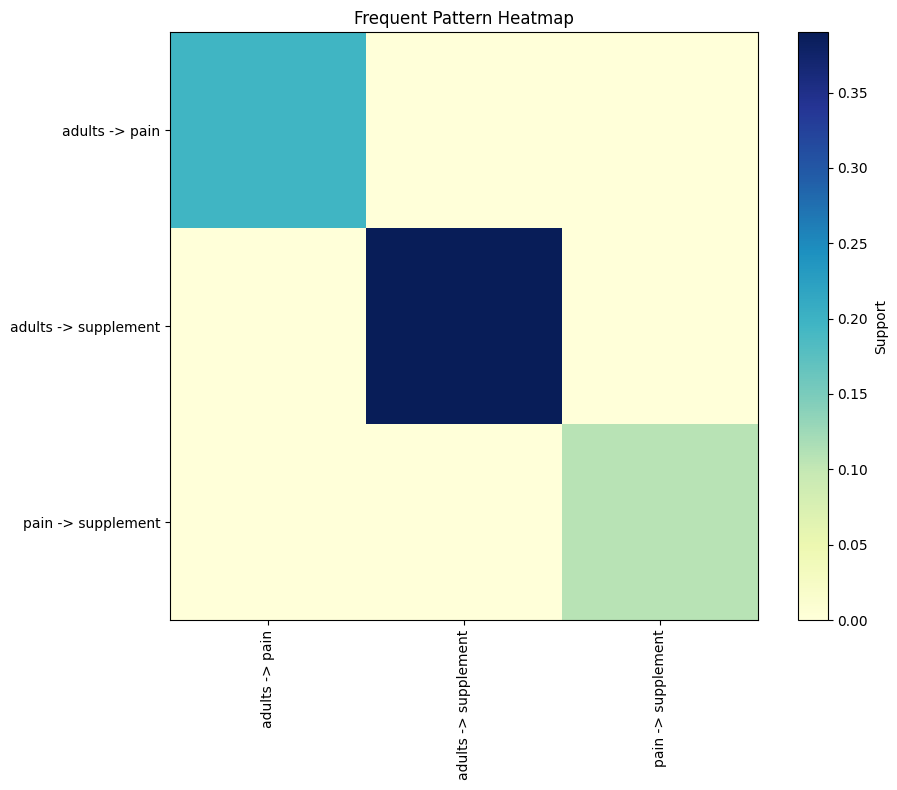

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting item pairs and their support values
itemsets = []
support = []

for item in results:
    pair = item[0]
    if len(pair) > 1:
        items = [x for x in pair]
        itemsets.append((items[0], items[1]))
        support.append(item[1])

# Creating a dictionary to map itemsets to indices
unique_itemsets = list(set(itemsets))
itemset_indices = {itemset: idx for idx, itemset in enumerate(unique_itemsets)}

# Creating an empty matrix to store support values
matrix_size = len(unique_itemsets)
support_matrix = np.zeros((matrix_size, matrix_size))

# Filling the matrix with support values
for idx, itemset in enumerate(itemsets):
    i = itemset_indices[itemset]
    support_matrix[i][i] = support[idx]

# Creating the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(support_matrix, cmap='YlGnBu', interpolation='nearest')

# Setting x and y-axis labels
plt.xticks(np.arange(len(unique_itemsets)), [item[0] + ' -> ' + item[1] for item in unique_itemsets], rotation=90)
plt.yticks(np.arange(len(unique_itemsets)), [item[0] + ' -> ' + item[1] for item in unique_itemsets])

# Adding color bar
plt.colorbar(label='Support')

# Displaying the plot
plt.title('Frequent Pattern Heatmap')
plt.tight_layout()
plt.show()


# Frequent Pattern Visualization 2:

In [153]:
results = list(apriori(transactions, min_support=0.01, min_confidence=0.1, min_length=2, max_length=2))
# Print the results
for item in results:
    pair = item[0]
    if(len(pair)>1):
        print(item)
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])

RelationRecord(items=frozenset({'adults', 'antibiotic'}), support=0.045354, ordered_statistics=[OrderedStatistic(items_base=frozenset({'antibiotic'}), items_add=frozenset({'adults'}), confidence=0.6741482846780427, lift=1.2289014227293888)])
Rule: adults -> antibiotic
RelationRecord(items=frozenset({'adults', 'disorientation'}), support=0.033332, ordered_statistics=[OrderedStatistic(items_base=frozenset({'disorientation'}), items_add=frozenset({'adults'}), confidence=0.7457824316463061, lift=1.35948293888254)])
Rule: adults -> disorientation
RelationRecord(items=frozenset({'adults', 'environmental allergy'}), support=0.010608, ordered_statistics=[OrderedStatistic(items_base=frozenset({'environmental allergy'}), items_add=frozenset({'adults'}), confidence=0.6965200262639527, lift=1.2696827548023302)])
Rule: adults -> environmental allergy
RelationRecord(items=frozenset({'adults', 'fever'}), support=0.055188, ordered_statistics=[OrderedStatistic(items_base=frozenset({'adults'}), items_ad

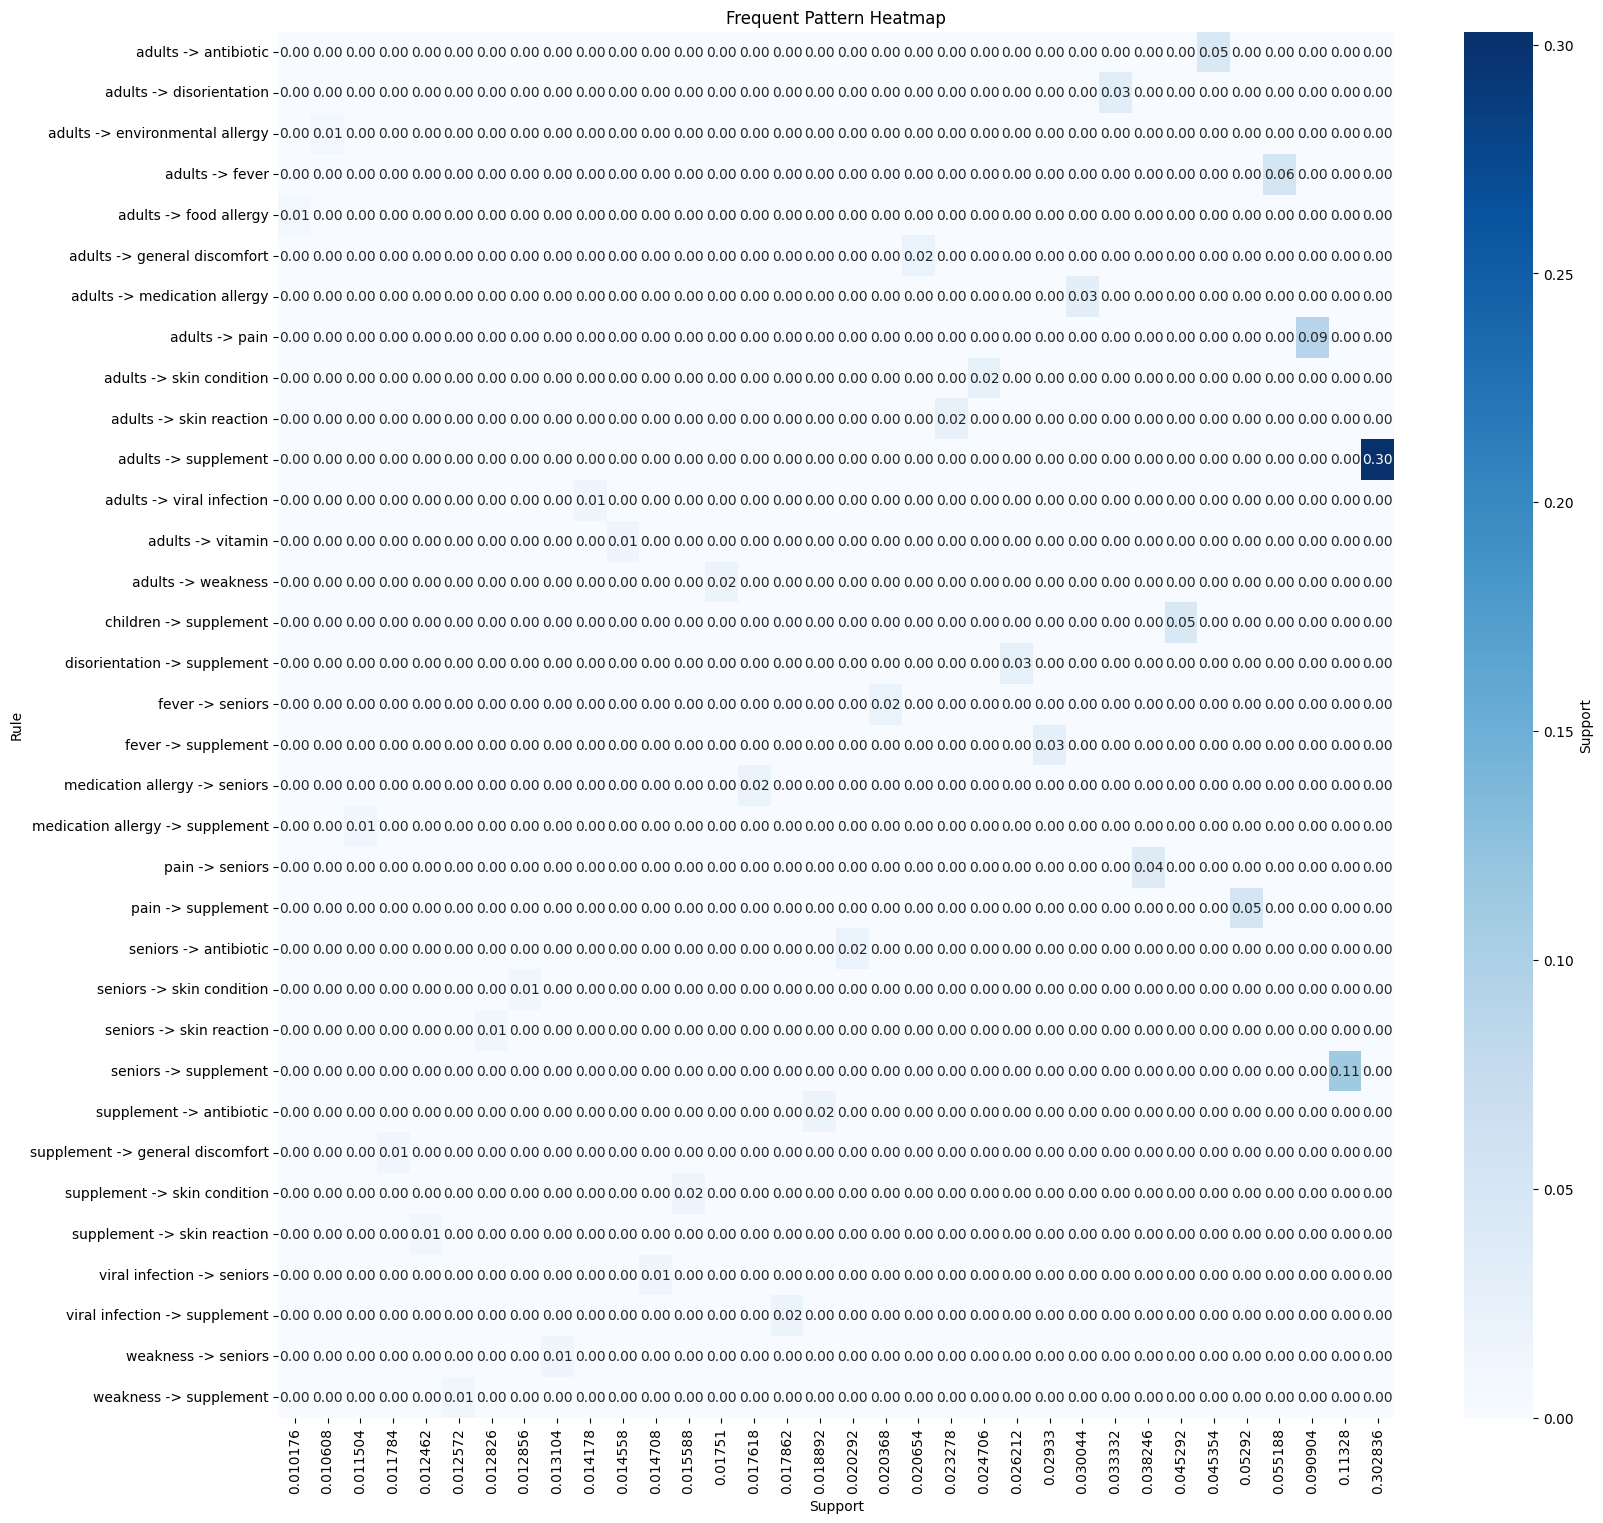

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting item pairs and their support values
itemsets = []
support = []

for item in results:
    pair = item[0]
    if len(pair) > 1:
        items = [x for x in pair]
        itemsets.append(f"{items[0]} -> {items[1]}")
        support.append(item[1])

# Creating a DataFrame with support values for itemsets
data = {"Rule": itemsets, "Support": support}
df = pd.DataFrame(data)

# Reshaping the data for heatmap
heatmap_data = df.pivot(index='Rule', columns='Support', values='Support').fillna(0)

# Creating the heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='.2f', cbar_kws={'label': 'Support'})
plt.title('Frequent Pattern Heatmap')
plt.xlabel('Support')
plt.ylabel('Rule')
plt.show()
